# 1. Install requirements

In [1]:
# Install requirements
!pip3 install -r ../requirements.txt

# 2. Load data set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/litani/Documents/myCode/sedimentation-rate/data/raw/Data_set_cas_1.csv", sep = ";")
df.head()

,TRIG,UNIT,DATE_DEBUT_DELTA,DATE_FIN_DELTA,VALEUR,MATERIAU,TENEUR,AP_mean,indicateur_1,indicateur_2,...,indicateur_32,indicateur_33,indicateur_34,indicateur_35,indicateur_36,indicateur_37,indicateur_38,indicateur_39,indicateur_40,indicateur_41
0,TOTO,1,19/12/2008 00:00,27/03/2010 00:00,10.500,A,0.444063,0.378566,10.062203,0.000000,...,0.017119,0.109406,0.0,0.023238,0.0,0.0,0.121218,0.853848,0.0,0.0
1,TOTO,1,11/08/2010 00:00,24/09/2011 00:00,15.000,B,0.444063,0.368023,10.111223,0.000000,...,0.022504,0.075858,0.0,0.039560,0.0,0.0,0.242235,0.720156,0.0,0.0
2,TOTO,1,23/12/2011 00:00,19/07/2014 00:00,15.000,A,0.444063,0.294338,32.332131,0.036355,...,0.036417,0.168086,0.0,0.046851,0.0,0.0,0.370249,0.582190,0.0,0.0
3,TOTO,1,08/10/2014 00:00,27/05/2017 00:00,18.125,A,0.444063,0.297240,41.795298,0.054157,...,0.041236,0.123513,0.0,0.063473,0.0,0.0,0.444262,0.483564,0.0,0.0
4,TOTO,1,25/10/2017 00:00,10/11/2018 00:00,37.625,A,0.444063,0.231139,14.202994,0.000224,...,0.047177,0.049189,0.0,0.055003,0.0,0.0,0.528452,0.417328,0.0,0.0


# 3. Data Quality

**[Question 3]:** <br>
Le SOUMISSIONNAIRE réalise une analyse de qualité des données. <br>

In [89]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TRIG                 78 non-null     object 
 1   UNIT                 78 non-null     int64  
 2   DATE_DEBUT_DELTA     78 non-null     object 
 3   DATE_FIN_DELTA       78 non-null     object 
 4   VALEUR               78 non-null     float64
 5   MATERIAU             78 non-null     object 
 6   TENEUR               78 non-null     float64
 7   AP_mean              78 non-null     float64
 8   indicateur_1         78 non-null     float64
 9   indicateur_2         64 non-null     float64
 10  CHIMIE1              66 non-null     float64
 11  pc0min               74 non-null     float64
 12  pmd                  78 non-null     float64
 13  CHIMIE2              78 non-null     float64
 14  indicateur_3         69 non-null     float64
 15  CHIMIE3              78 non-null     float

**Observations:**
*   cols = 61 + target
*   rows = 78 <br>
We are dealing with a dimensionality problem, we will need to reduce the features. <br> Before eliminating features, check data distribution, duplicates and null.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe().map(lambda x: round(x,3))

,UNIT,VALEUR,TENEUR,AP_mean,indicateur_1,indicateur_2,CHIMIE1,pc0min,pmd,CHIMIE2,indicateur_3,CHIMIE3,sortie_1,chimie3_first_range,chimie3_sr,indicateur_4,TARGET,info,indicateur_5,indicateur_6,sortie_2,sortie_3,CHIMIE4,indicateur_7,indicateur_8,indicateur_9,indicateur_10,indicateur_11,indicateur_12,indicateur_13,indicateur_14,indicateur_15,indicateur_16,indicateur_17,indicateur_18,indicateur_19,indicateur_20,indicateur_21,indicateur_22,indicateur_23,indicateur_24,indicateur_25,indicateur_26,indicateur_27,indicateur_28,indicateur_29,indicateur_30,indicateur_31,indicateur_32,indicateur_33,indicateur_34,indicateur_35,indicateur_36,indicateur_37,indicateur_38,indicateur_39,indicateur_40,indicateur_41
count,78.000,78.000,78.000,78.000,78.000,64.000,66.000,74.000,78.000,78.000,69.000,78.000,73.000,78.000,78.000,73.000,74.000,78.000,78.000,78.000,78.000,78.000,78.000,74.000,78.000,75.000,73.000,78.000,75.000,78.000,73.000,75.000,76.000,68.000,78.000,78.000,78.000,74.000,75.000,76.000,78.0,78.000,78.000,78.000,78.000,78.000,78.000,78.000,78.000,78.000,78.000,78.000,78.0,77.000,77.000,77.000,77.000,78.000
mean,1.846,19.107,0.503,0.261,47.824,0.039,0.188,0.005,0.402,1.632,0.395,0.129,0.108,0.128,0.199,0.039,2.536,0.705,0.181,0.024,0.065,0.275,0.126,0.066,0.000,0.328,0.609,0.036,0.907,0.056,0.064,0.317,0.617,0.067,0.000,0.000,0.046,0.052,0.267,0.640,0.0,0.000,0.144,0.625,0.177,0.014,0.748,0.000,0.052,0.123,0.000,0.069,0.0,0.000,0.189,0.747,0.002,0.017
std,0.994,9.497,0.189,0.065,31.651,0.083,0.148,0.008,0.203,1.223,0.191,0.157,0.139,0.210,0.237,0.020,3.226,0.723,0.297,0.018,0.029,0.161,0.270,0.030,0.003,0.164,0.179,0.035,0.049,0.029,0.028,0.157,0.160,0.032,0.002,0.002,0.028,0.027,0.203,0.217,0.0,0.002,0.263,0.338,0.281,0.012,0.211,0.001,0.027,0.126,0.000,0.049,0.0,0.001,0.152,0.162,0.017,0.044
min,1.000,10.000,0.194,0.121,3.372,0.000,0.000,0.000,0.000,0.407,0.023,0.000,0.002,0.000,0.000,0.010,0.000,0.000,0.000,0.003,0.019,0.008,0.000,0.019,0.000,0.031,0.012,0.000,0.750,0.014,0.019,0.047,0.029,0.019,0.000,0.000,0.007,0.010,0.003,0.007,0.0,0.000,0.000,0.000,0.003,0.000,0.130,0.000,0.013,0.008,0.000,0.018,0.0,0.000,0.003,0.234,0.000,0.000
25%,1.000,10.459,0.354,0.214,18.941,0.000,0.058,0.000,0.293,1.076,0.269,0.003,0.019,0.000,0.005,0.025,0.000,0.000,0.000,0.011,0.044,0.153,0.000,0.045,0.000,0.209,0.473,0.000,0.884,0.037,0.044,0.213,0.526,0.044,0.000,0.000,0.024,0.030,0.122,0.538,0.0,0.000,0.004,0.372,0.036,0.005,0.667,0.000,0.031,0.042,0.000,0.042,0.0,0.000,0.063,0.632,0.000,0.000
50%,2.000,15.625,0.455,0.264,41.795,0.020,0.174,0.001,0.389,1.380,0.399,0.070,0.042,0.007,0.066,0.033,1.491,1.000,0.004,0.018,0.061,0.263,0.000,0.063,0.000,0.321,0.611,0.032,0.906,0.051,0.059,0.296,0.627,0.062,0.000,0.000,0.039,0.052,0.216,0.693,0.0,0.000,0.013,0.798,0.057,0.011,0.827,0.000,0.047,0.083,0.000,0.056,0.0,0.000,0.154,0.789,0.000,0.000
75%,2.000,26.991,0.593,0.310,74.585,0.054,0.286,0.006,0.531,1.718,0.510,0.189,0.144,0.187,0.360,0.046,4.034,1.000,0.235,0.032,0.081,0.394,0.034,0.079,0.000,0.444,0.754,0.062,0.945,0.072,0.079,0.406,0.734,0.087,0.000,0.000,0.069,0.069,0.351,0.799,0.0,0.000,0.076,0.901,0.136,0.020,0.906,0.000,0.068,0.168,0.000,0.081,0.0,0.000,0.292,0.879,0.000,0.004
max,4.000,43.500,0.929,0.466,123.289,0.643,0.543,0.032,0.849,6.765,0.913,0.665,0.696,0.753,0.820,0.098,14.979,2.000,0.921,0.094,0.179,0.922,0.946,0.175,0.024,0.919,0.928,0.125,0.985,0.144,0.155,0.911,0.905,0.184,0.021,0.019,0.122,0.132,0.857,0.929,0.0,0.014,0.955,0.969,0.988,0.058,0.967,0.004,0.133,0.670,0.002,0.348,0.0,0.005,0.653,0.965,0.144,0.249


In [5]:
# Identify columns with a mean < .05 and numeric data type (int or float)
zero_mean_cols = df.select_dtypes(exclude=["object"]).columns[df.select_dtypes(exclude=["object"]).mean() < .05]

zero_mean_cols

Index(['indicateur_2', 'pc0min', 'indicateur_4', 'indicateur_6',
       'indicateur_8', 'indicateur_11', 'indicateur_18', 'indicateur_19',
       'indicateur_20', 'indicateur_24', 'indicateur_25', 'indicateur_29',
       'indicateur_31', 'indicateur_34', 'indicateur_36', 'indicateur_37',
       'indicateur_40', 'indicateur_41'],
      dtype='object')

In [6]:
# Counting the number of NaN for each column
df.isnull().sum().sort_values(ascending=False)/len(df)*100

indicateur_2           17.948718
CHIMIE1                15.384615
indicateur_17          12.820513
indicateur_3           11.538462
indicateur_4            6.410256
sortie_1                6.410256
indicateur_10           6.410256
indicateur_14           6.410256
TARGET                  5.128205
pc0min                  5.128205
indicateur_21           5.128205
indicateur_7            5.128205
indicateur_9            3.846154
indicateur_15           3.846154
indicateur_12           3.846154
indicateur_22           3.846154
indicateur_16           2.564103
indicateur_23           2.564103
indicateur_38           1.282051
indicateur_39           1.282051
indicateur_40           1.282051
indicateur_37           1.282051
CHIMIE2                 0.000000
pmd                     0.000000
AP_mean                 0.000000
VALEUR                  0.000000
MATERIAU                0.000000
DATE_DEBUT_DELTA        0.000000
TRIG                    0.000000
UNIT                    0.000000
indicateur

In [6]:
# Check for duplicates
df.duplicated().sum()

np.int64(6)

# 4. Visual investigation - EDA

**[Q4] Le SOUMISSIONNAIRE réalise une exploration visuelle des données**

In [7]:
# Plot the distribution of all features --> got use AI to do the DataViz part
numeric_features = df.select_dtypes(exclude=["object"])
numeric_features.head()

,UNIT,VALEUR,TENEUR,AP_mean,indicateur_1,indicateur_2,CHIMIE1,pc0min,pmd,CHIMIE2,indicateur_3,CHIMIE3,sortie_1,chimie3_first_range,chimie3_sr,indicateur_4,TARGET,info,indicateur_5,indicateur_6,sortie_2,sortie_3,CHIMIE4,indicateur_7,indicateur_8,indicateur_9,indicateur_10,indicateur_11,indicateur_12,indicateur_13,indicateur_14,indicateur_15,indicateur_16,indicateur_17,indicateur_18,indicateur_19,indicateur_20,indicateur_21,indicateur_22,indicateur_23,indicateur_24,indicateur_25,indicateur_26,indicateur_27,indicateur_28,indicateur_29,indicateur_30,indicateur_31,indicateur_32,indicateur_33,indicateur_34,indicateur_35,indicateur_36,indicateur_37,indicateur_38,indicateur_39,indicateur_40,indicateur_41
0,1,10.500,0.444063,0.378566,10.062203,0.000000,0.126126,0.000000e+00,0.177257,1.187220,0.768272,0.274678,0.104385,0.0,0.224232,0.018232,4.116356,1,0.000380,0.041374,0.022957,0.158452,0.0,0.023145,0.0,0.211957,0.764899,0.000000,0.984914,0.015086,0.023051,0.420633,0.556316,0.023145,0.0,0.0,0.013493,0.010588,0.314374,0.661544,0.0,0.0,0.000000,0.000000,0.985851,0.014149,0.882684,0.000000,0.017119,0.109406,0.0,0.023238,0.0,0.0,0.121218,0.853848,0.0,0.0
1,1,15.000,0.444063,0.368023,10.111223,0.000000,0.033943,0.000000e+00,0.399601,1.049751,0.485827,0.103194,0.095317,0.0,0.332572,0.030636,0.000000,1,0.000000,0.043374,0.039144,0.310663,0.0,0.043609,0.0,0.350639,0.605752,0.000000,0.969266,0.030734,0.044128,0.476378,0.479493,0.044232,0.0,0.0,0.012667,0.031980,0.377842,0.577510,0.0,0.0,0.000000,0.000000,0.981622,0.018378,0.965736,0.000000,0.022504,0.075858,0.0,0.039560,0.0,0.0,0.242235,0.720156,0.0,0.0
2,1,15.000,0.444063,0.294338,32.332131,0.036355,0.116571,1.142667e-03,0.307240,1.442307,0.509781,0.086462,0.034685,0.0,0.015521,0.036834,1.464318,1,0.000000,0.026954,0.049141,0.439313,0.0,0.048330,0.0,0.466555,NaN,0.043273,0.905534,0.051193,0.058731,0.637214,0.304055,NaN,0.0,0.0,0.039790,0.061594,0.470849,0.427767,0.0,0.0,0.009542,0.013597,0.914170,0.026336,0.862337,0.000049,0.036417,0.168086,0.0,0.046851,0.0,0.0,0.370249,0.582190,0.0,0.0
3,1,18.125,0.444063,0.297240,41.795298,0.054157,0.174769,7.218757e-07,0.498252,1.703196,0.327734,0.160000,0.029440,0.0,0.075171,NaN,9.261458,1,0.006348,0.021394,0.068404,0.254133,0.0,0.062506,0.0,0.269216,0.668278,0.062157,0.887748,0.050095,0.063956,0.340472,0.595572,NaN,0.0,0.0,0.047955,0.065648,0.190709,0.695688,0.0,0.0,0.011809,0.191801,0.730665,0.011470,0.738132,0.000000,0.041236,0.123513,0.0,0.063473,0.0,0.0,0.444262,0.483564,0.0,0.0
4,1,37.625,0.444063,0.231139,14.202994,0.000224,0.283019,0.000000e+00,0.849349,1.235376,0.062165,0.061828,NaN,0.0,0.299497,NaN,4.506719,1,0.003140,0.016934,0.052873,0.029622,0.0,0.053320,0.0,0.036888,0.909792,0.000000,0.948469,0.051531,0.053214,0.212856,0.733930,NaN,0.0,0.0,0.035882,0.018556,0.021015,0.924547,0.0,0.0,0.000000,0.908255,0.077389,0.014132,0.927893,0.000000,0.047177,0.049189,0.0,0.055003,0.0,0.0,0.528452,0.417328,0.0,0.0


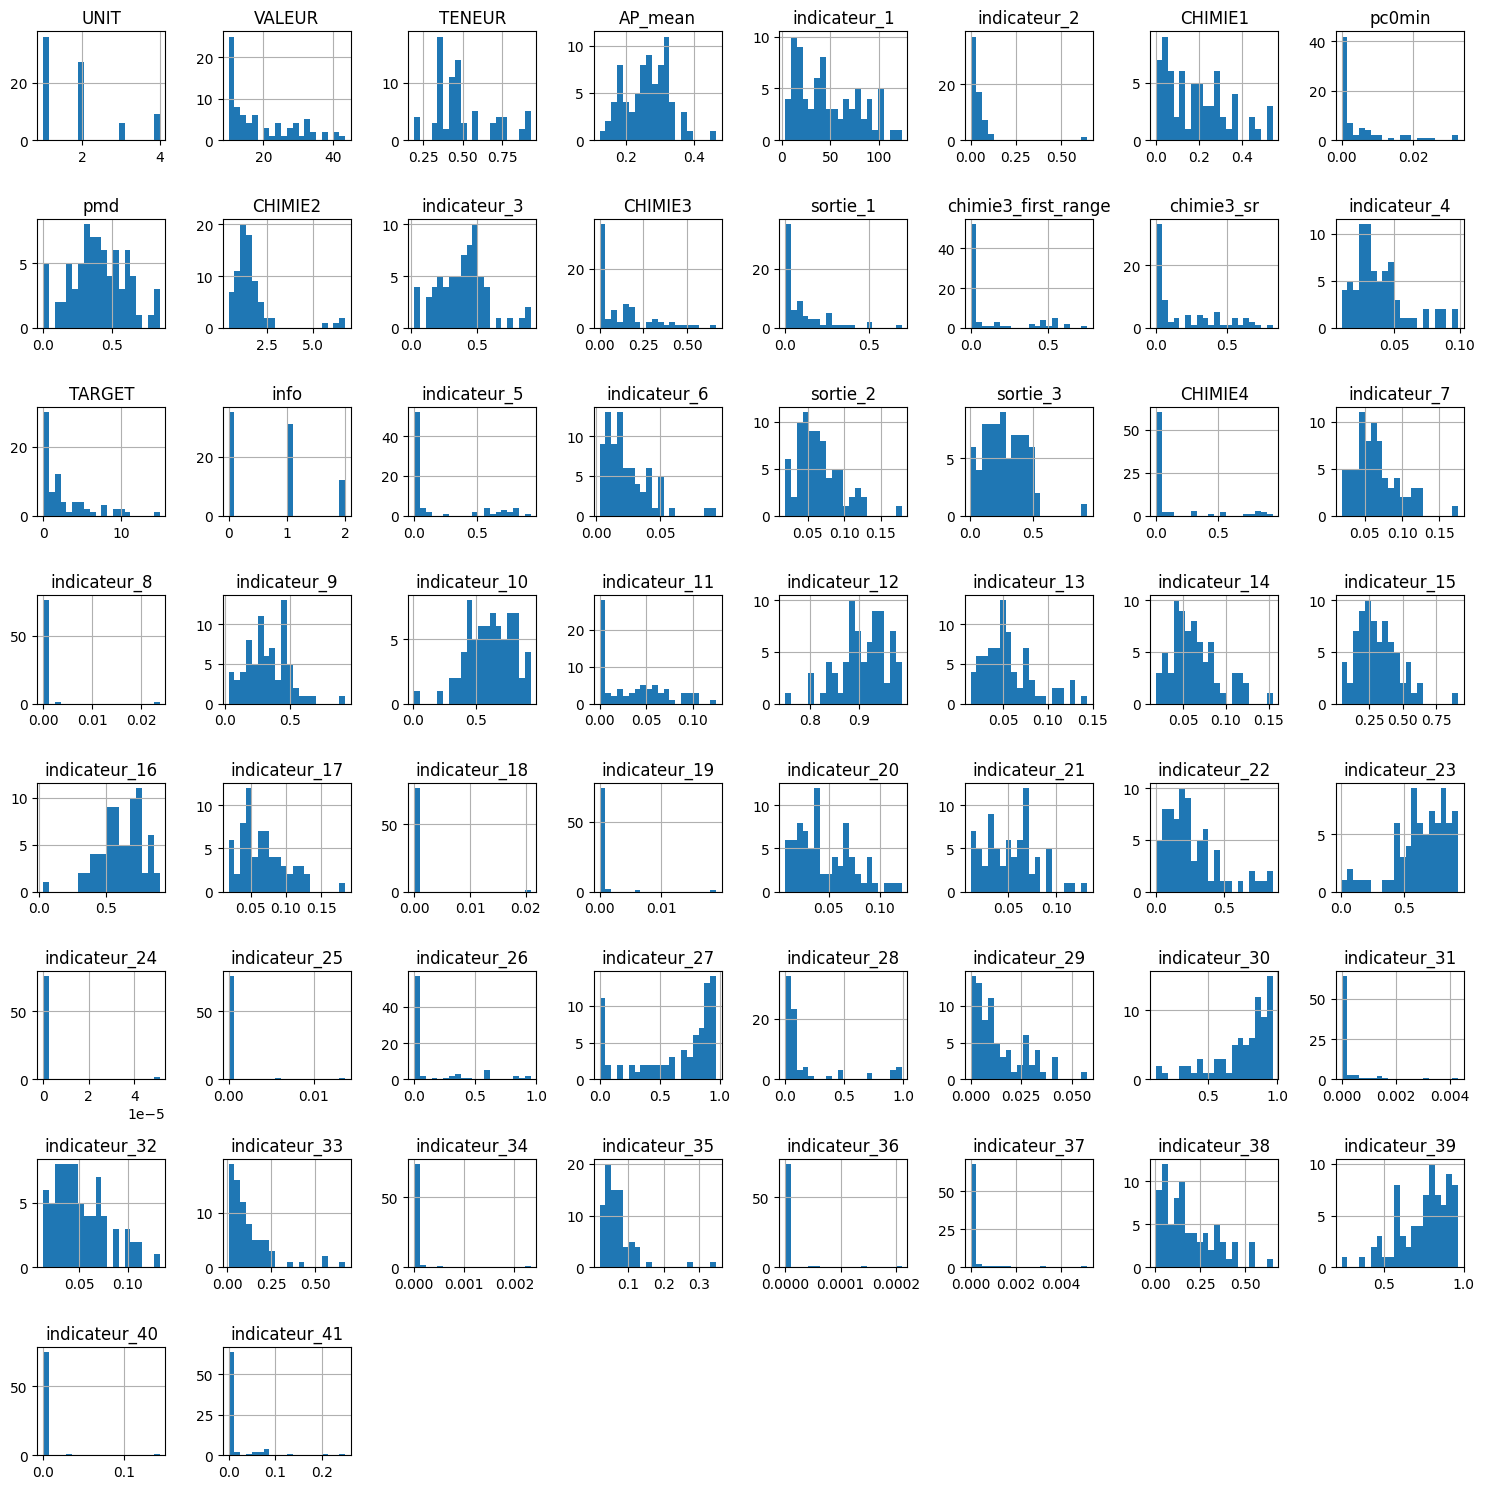

In [8]:
numeric_features.hist(figsize=(15, 15), bins = 20)
plt.tight_layout()
plt.show()

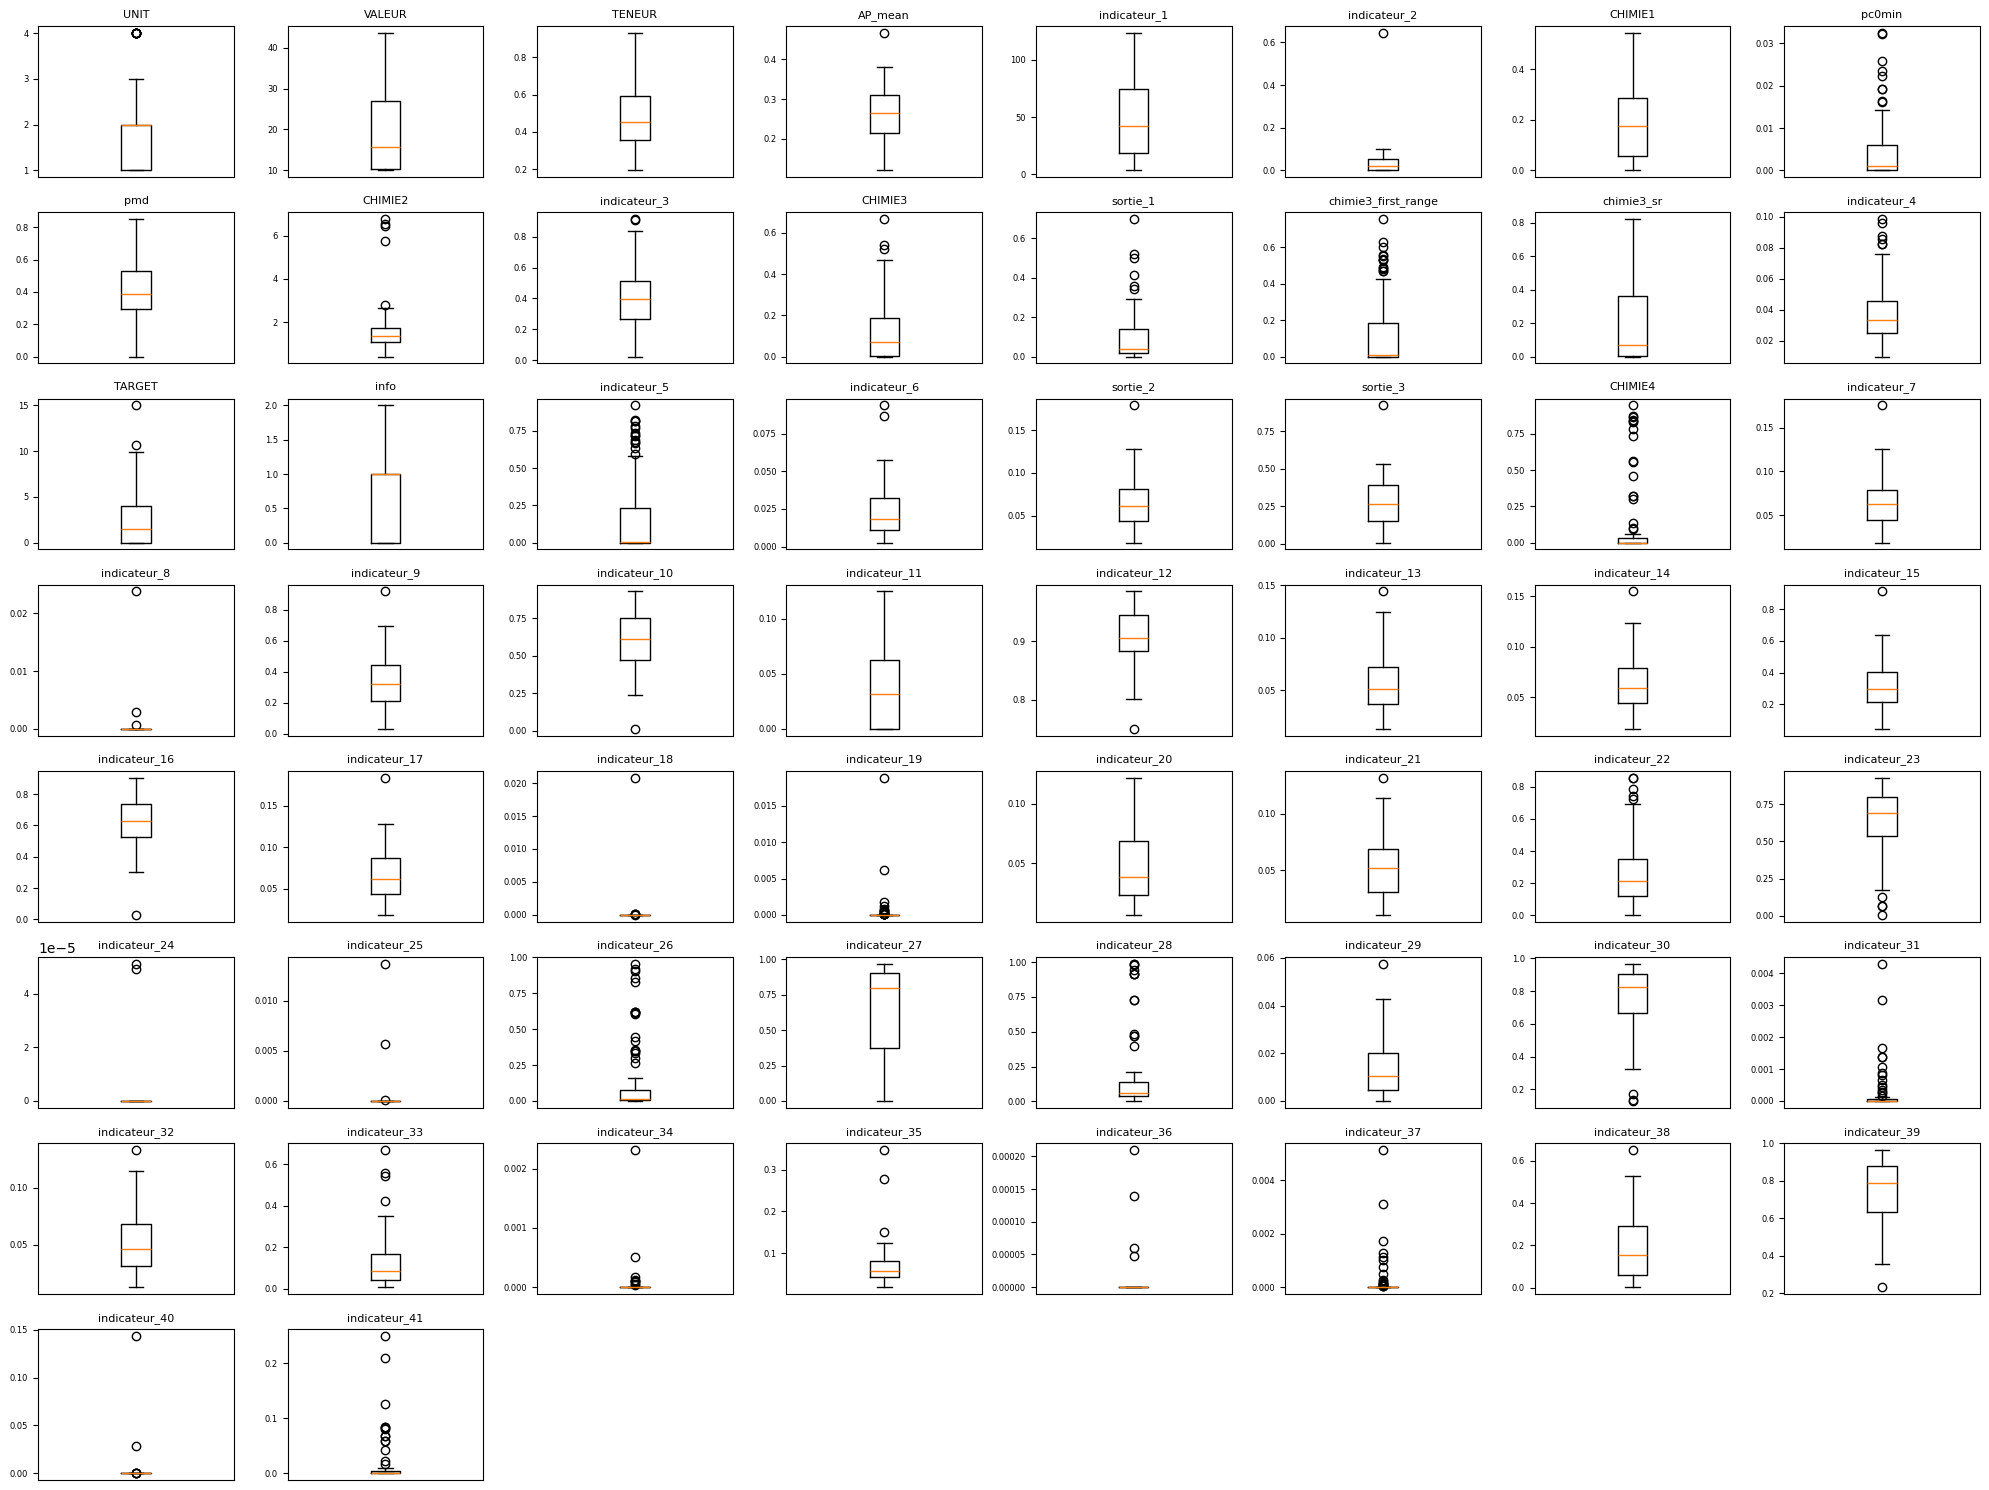

In [9]:
# Create boxplots for each numeric feature in separate subplots
plt.figure(figsize=(20, 15))  # Adjust figure size as needed

for i, column in enumerate(numeric_features.columns):
    plt.subplot(8, 8, i + 1)  # Create subplots in an 8x8 grid
    plt.boxplot(numeric_features[column].dropna())  # Drop NaN values for boxplot
    plt.title(column, fontsize=8)  # Set title with column name
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks(fontsize=6)  # Adjust y-axis tick font size

plt.tight_layout()
plt.show()

**Observations:**
Features that are skewed (outliers) and have no variance should be elimintaed:

* CHIMIE_4
* chimie_first_range
* info
* indicateur_41, 40, 37, 36, 34, 31, 26, 25, 24, 19, 18, 8, 5.
<br>

*Check next for feature correlation.*👇🏼


**[Q8] Le SOUMISSIONNAIRE réalise une analyse exploratoire de corrélation entre les données**

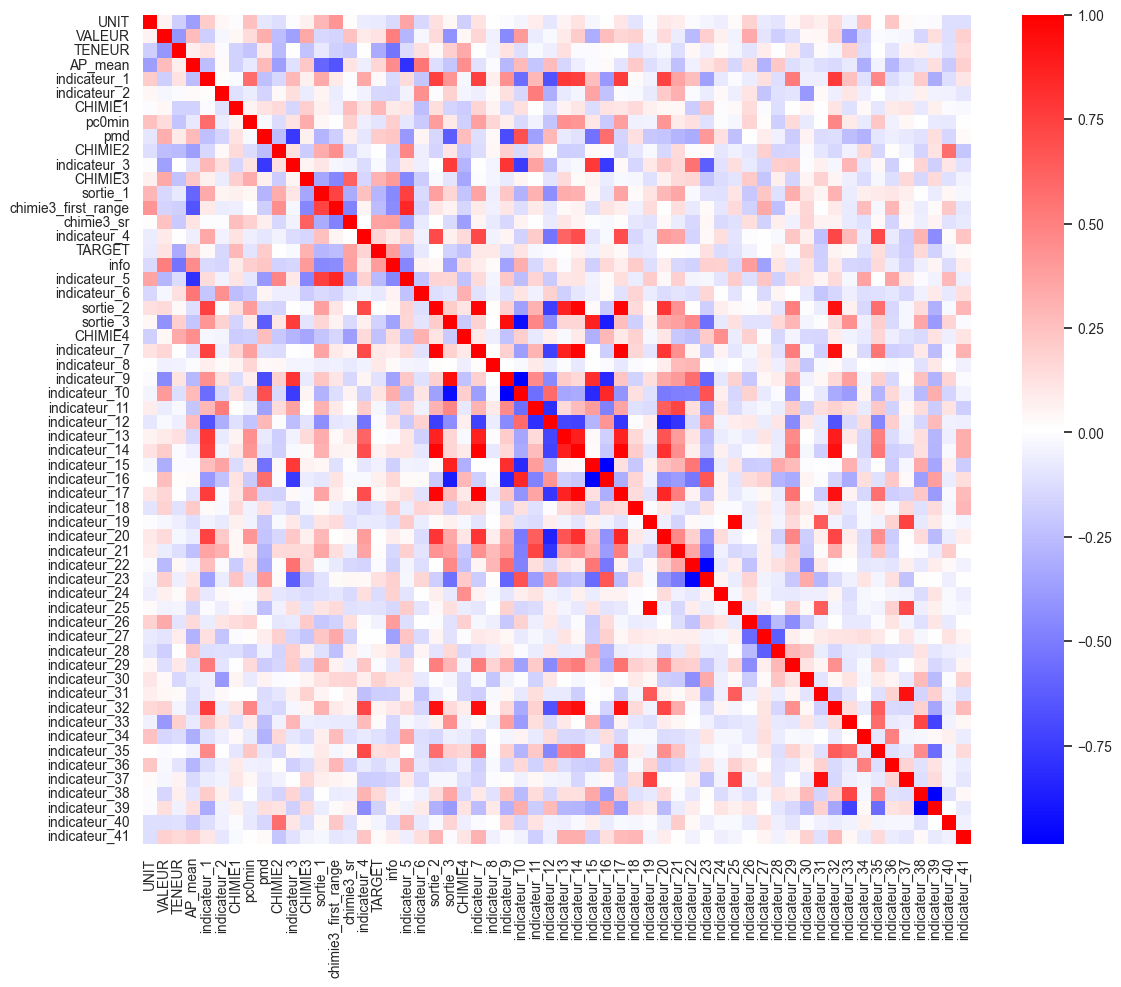

In [90]:
# Heatmap of pairwise correlations
corr_matrix = df.select_dtypes(exclude = "object").corr()
column_names = corr_matrix.columns

# Figure size
plt.figure(figsize=(12, 10))

# Font scale
sns.set(font_scale=0.9)

# Plot heatmap
sns.heatmap(corr_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

plt.tight_layout()
plt.show()

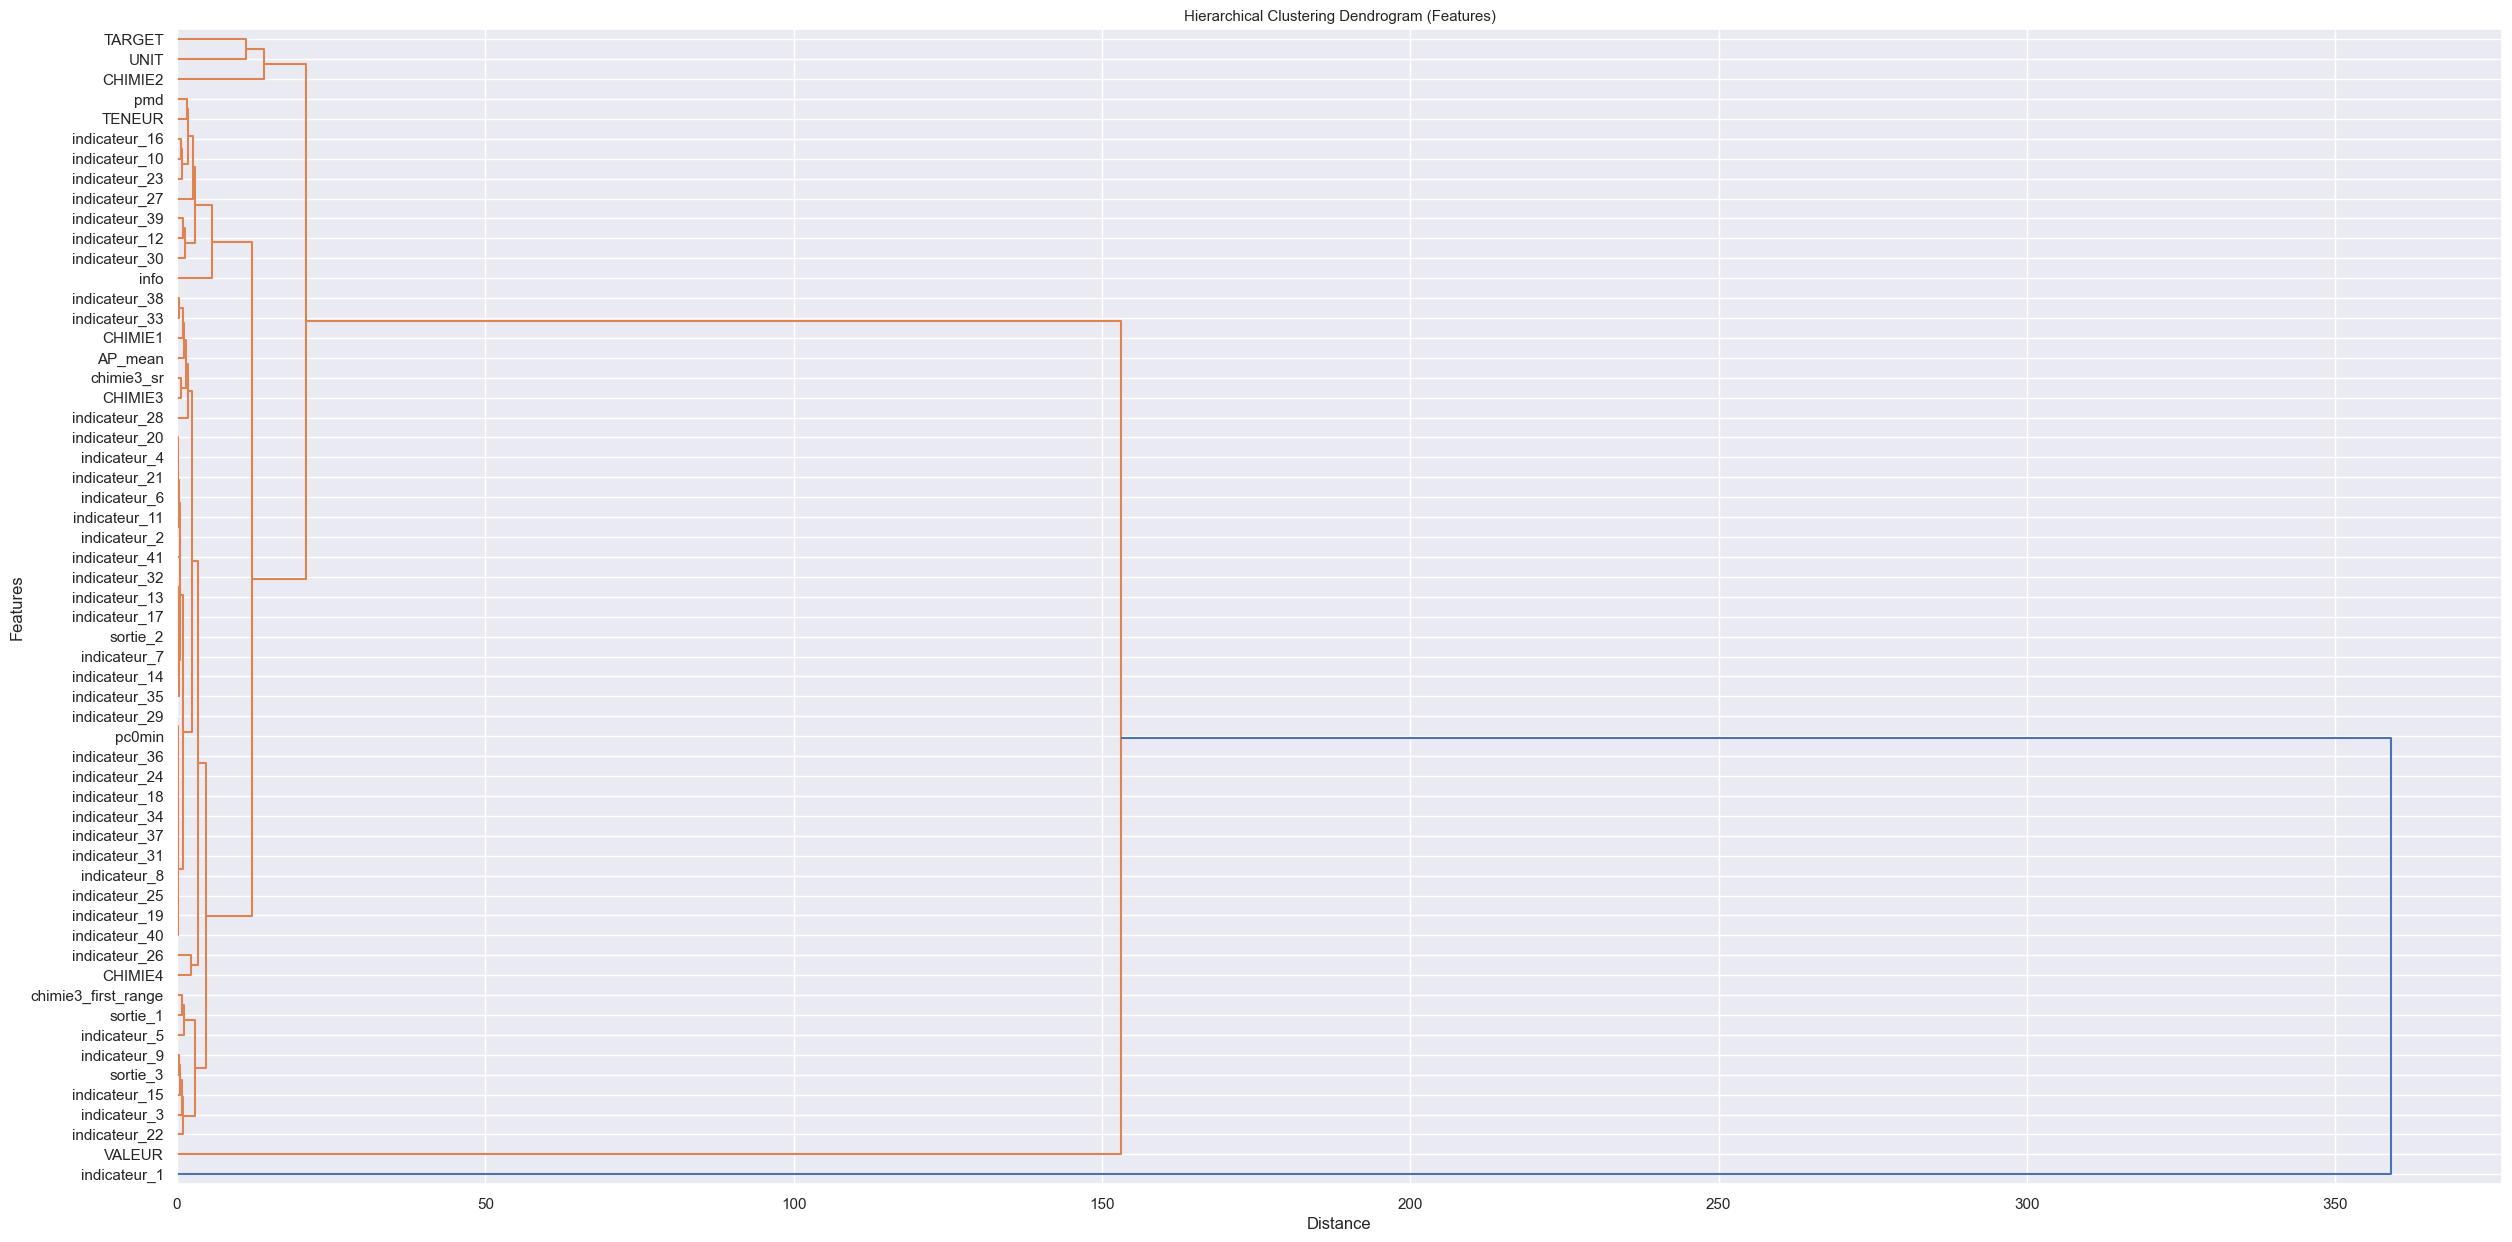

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(exclude = "object").dropna()

Z_cols = linkage(df_numeric.T, method='ward')

# Plot the dendrogram to visualize feature clustering
plt.figure(figsize=(30, 15))
dendrogram(Z_cols, labels=df_numeric.columns, orientation='right')
plt.title("Hierarchical Clustering Dendrogram (Features)")
plt.xlabel("Distance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)

# Tick font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

In [17]:
import numpy as np
# Convert the correlation matrix into a DataFrame
corr_df = corr_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Show the top 20 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(20*2)

,feature_1,feature_2,correlation,absolute_correlation
1937,indicateur_17,indicateur_7,0.994952,0.994952
1367,indicateur_7,indicateur_17,0.994952,0.994952
2071,indicateur_19,indicateur_25,0.988528,0.988528
2413,indicateur_25,indicateur_19,0.988528,0.988528
1763,indicateur_14,indicateur_7,0.986392,0.986392
1364,indicateur_7,indicateur_14,0.986392,0.986392
1533,indicateur_10,indicateur_9,-0.985277,0.985277
1476,indicateur_9,indicateur_10,-0.985277,0.985277
1887,indicateur_16,indicateur_15,-0.985204,0.985204
1830,indicateur_15,indicateur_16,-0.985204,0.985204


In [18]:
top_corr = corr_df.sort_values(by="absolute_correlation", ascending=False).head(20*2)
top_corr.feature_1.unique()

array(['indicateur_17', 'indicateur_7', 'indicateur_19', 'indicateur_25',
       'indicateur_14', 'indicateur_10', 'indicateur_9', 'indicateur_16',
       'indicateur_15', 'sortie_2', 'indicateur_39', 'indicateur_38',
       'indicateur_22', 'indicateur_23', 'sortie_3', 'indicateur_32',
       'indicateur_31', 'indicateur_37', 'indicateur_13'], dtype=object)

In [19]:
import numpy as np
# Eliminate features that have low variance and extremely skewed
low_var_cols = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).mean() < .05].tolist()

low_var_cols


['indicateur_2',
 'pc0min',
 'indicateur_4',
 'indicateur_6',
 'indicateur_8',
 'indicateur_11',
 'indicateur_18',
 'indicateur_19',
 'indicateur_20',
 'indicateur_24',
 'indicateur_25',
 'indicateur_29',
 'indicateur_31',
 'indicateur_34',
 'indicateur_36',
 'indicateur_37',
 'indicateur_40',
 'indicateur_41']

In [20]:
drop_col = np.concatenate((top_corr.feature_1.unique(), low_var_cols, ["UNIT"],["info"]))
drop_col

array(['indicateur_17', 'indicateur_7', 'indicateur_19', 'indicateur_25',
       'indicateur_14', 'indicateur_10', 'indicateur_9', 'indicateur_16',
       'indicateur_15', 'sortie_2', 'indicateur_39', 'indicateur_38',
       'indicateur_22', 'indicateur_23', 'sortie_3', 'indicateur_32',
       'indicateur_31', 'indicateur_37', 'indicateur_13', 'indicateur_2',
       'pc0min', 'indicateur_4', 'indicateur_6', 'indicateur_8',
       'indicateur_11', 'indicateur_18', 'indicateur_19', 'indicateur_20',
       'indicateur_24', 'indicateur_25', 'indicateur_29', 'indicateur_31',
       'indicateur_34', 'indicateur_36', 'indicateur_37', 'indicateur_40',
       'indicateur_41', 'UNIT', 'info'], dtype=object)

# 5. Data Cleaning
**[Q6] Le SOUMISSIONNAIRE nettoie les données** 
- remove duplicates
- remove columns having no analytical value (info?)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TRIG                 78 non-null     object 
 1   UNIT                 78 non-null     int64  
 2   DATE_DEBUT_DELTA     78 non-null     object 
 3   DATE_FIN_DELTA       78 non-null     object 
 4   VALEUR               78 non-null     float64
 5   MATERIAU             78 non-null     object 
 6   TENEUR               78 non-null     float64
 7   AP_mean              78 non-null     float64
 8   indicateur_1         78 non-null     float64
 9   indicateur_2         64 non-null     float64
 10  CHIMIE1              66 non-null     float64
 11  pc0min               74 non-null     float64
 12  pmd                  78 non-null     float64
 13  CHIMIE2              78 non-null     float64
 14  indicateur_3         69 non-null     float64
 15  CHIMIE3              78 non-null     float

In [22]:
# Counting the number of NaN for each column
df.isnull().sum().sort_values(ascending=False)/len(df)*100

indicateur_2           17.948718
CHIMIE1                15.384615
indicateur_17          12.820513
indicateur_3           11.538462
indicateur_14           6.410256
indicateur_10           6.410256
sortie_1                6.410256
indicateur_4            6.410256
pc0min                  5.128205
indicateur_7            5.128205
TARGET                  5.128205
indicateur_21           5.128205
indicateur_15           3.846154
indicateur_22           3.846154
indicateur_9            3.846154
indicateur_12           3.846154
indicateur_23           2.564103
indicateur_16           2.564103
indicateur_39           1.282051
indicateur_38           1.282051
indicateur_37           1.282051
indicateur_40           1.282051
indicateur_24           0.000000
indicateur_20           0.000000
indicateur_34           0.000000
indicateur_26           0.000000
indicateur_25           0.000000
indicateur_35           0.000000
indicateur_27           0.000000
indicateur_28           0.000000
indicateur

In [23]:
# Display duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,TRIG,UNIT,DATE_DEBUT_DELTA,DATE_FIN_DELTA,VALEUR,MATERIAU,TENEUR,AP_mean,indicateur_1,indicateur_2,CHIMIE1,pc0min,pmd,CHIMIE2,indicateur_3,CHIMIE3,sortie_1,chimie3_first_range,chimie3_sr,indicateur_4,TARGET,info,indicateur_5,indicateur_6,sortie_2,sortie_3,CHIMIE4,indicateur_7,indicateur_8,indicateur_9,indicateur_10,indicateur_11,indicateur_12,indicateur_13,indicateur_14,indicateur_15,indicateur_16,indicateur_17,indicateur_18,indicateur_19,indicateur_20,indicateur_21,indicateur_22,indicateur_23,indicateur_24,indicateur_25,indicateur_26,indicateur_27,indicateur_28,indicateur_29,indicateur_30,indicateur_31,indicateur_32,indicateur_33,indicateur_34,indicateur_35,indicateur_36,indicateur_37,indicateur_38,indicateur_39,indicateur_40,indicateur_41
17,TOTO,1,23/12/2011 00:00,19/07/2014 00:00,15.000,A,0.444063,0.294338,32.332131,0.036355,0.116571,1.142667e-03,0.307240,1.442307,0.509781,0.086462,0.034685,0.000000,0.015521,0.036834,1.464318,1,0.000000,0.026954,0.049141,0.439313,0.000000,0.048330,0.0,0.466555,NaN,0.043273,0.905534,0.051193,0.058731,0.637214,0.304055,NaN,0.0,0.0,0.039790,0.061594,0.470849,0.427767,0.0,0.0,0.009542,0.013597,0.914170,0.026336,0.862337,0.000049,0.036417,0.168086,0.0,0.046851,0.0,0.0,0.370249,0.582190,0.0,0.000000
18,TOTO,1,08/10/2014 00:00,27/05/2017 00:00,18.125,A,0.444063,0.297240,41.795298,0.054157,0.174769,7.218757e-07,0.498252,1.703196,0.327734,0.160000,0.029440,0.000000,0.075171,NaN,9.261458,1,0.006348,0.021394,0.068404,0.254133,0.000000,0.062506,0.0,0.269216,0.668278,0.062157,0.887748,0.050095,0.063956,0.340472,0.595572,NaN,0.0,0.0,0.047955,0.065648,0.190709,0.695688,0.0,0.0,0.011809,0.191801,0.730665,0.011470,0.738132,0.000000,0.041236,0.123513,0.0,0.063473,0.0,0.0,0.444262,0.483564,0.0,0.000000
19,TOTO,1,25/10/2017 00:00,10/11/2018 00:00,37.625,A,0.444063,0.231139,14.202994,0.000224,0.283019,0.000000e+00,0.849349,1.235376,0.062165,0.061828,NaN,0.000000,0.299497,NaN,4.506719,1,0.003140,0.016934,0.052873,0.029622,0.000000,0.053320,0.0,0.036888,0.909792,0.000000,0.948469,0.051531,0.053214,0.212856,0.733930,NaN,0.0,0.0,0.035882,0.018556,0.021015,0.924547,0.0,0.0,0.000000,0.908255,0.077389,0.014132,0.927893,0.000000,0.047177,0.049189,0.0,0.055003,0.0,0.0,0.528452,0.417328,0.0,0.000000
20,TOTO,2,17/01/2008 00:00,23/05/2009 00:00,29.375,B,0.458285,0.276386,76.116373,0.090033,0.027311,2.674967e-03,0.200573,1.137764,0.588865,0.133197,NaN,0.000000,0.151718,0.027142,2.114344,0,0.003525,0.004268,0.064421,0.435232,0.000000,0.065029,0.0,0.493141,0.441830,0.095971,0.850866,0.053163,NaN,0.476732,0.453464,NaN,0.0,0.0,0.090641,0.066765,0.372287,0.470307,0.0,0.0,0.018232,0.718962,0.145164,0.027609,0.621028,0.001392,0.048978,0.083341,0.0,0.058634,0.0,0.0,0.137103,0.808873,0.0,0.000000
39,VET,2,15/12/2008 00:00,17/04/2010 00:00,11.150,C,0.928905,0.182203,103.936099,0.055449,0.173913,4.383343e-04,0.295706,1.160612,0.511121,0.002237,0.266958,0.017757,0.431028,0.082521,1.900683,0,0.582474,0.016656,0.118972,0.469159,0.000000,0.119439,0.0,0.466449,0.414112,0.071776,0.803364,0.124860,0.116449,0.353084,0.530467,0.120280,0.0,0.0,0.074019,NaN,0.222430,0.585794,0.0,0.0,0.027916,0.409823,0.465944,0.040867,0.794781,0.000000,0.103067,0.184282,0.0,0.122617,0.0,0.0,0.318455,0.565829,0.0,0.068027
40,VET,2,21/07/2010 00:00,16/02/2013 00:00,13.125,D,0.928905,0.311260,74.585379,0.041976,0.019608,2.486901e-04,0.375349,0.987059,0.464997,0.024000,0.130745,0.187016,0.027470,0.053100,2.110219,0,0.073672,0.051304,0.092412,0.408134,0.322798,0.090602,0.0,0.440469,0.468928,0.045102,0.873057,0.081840,0.081412,0.327218,0.591369,0.093532,0.0,0.0,0.069056,NaN,0.294948,0.574260,0.0,0.0,0.010756,0.761279,0.154150,0.031791,0.860415,0.000000,0.071646,0.212985,0.0,0.096831,0.0,0.0,0.350526,0.563306,0.0,0.058553


In [24]:
len(df)

78

In [25]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame without duplicates
print("\nDataFrame without duplicates:")
df_no_duplicates.head()


DataFrame without duplicates:


,TRIG,UNIT,DATE_DEBUT_DELTA,DATE_FIN_DELTA,VALEUR,MATERIAU,TENEUR,AP_mean,indicateur_1,indicateur_2,CHIMIE1,pc0min,pmd,CHIMIE2,indicateur_3,CHIMIE3,sortie_1,chimie3_first_range,chimie3_sr,indicateur_4,TARGET,info,indicateur_5,indicateur_6,sortie_2,sortie_3,CHIMIE4,indicateur_7,indicateur_8,indicateur_9,indicateur_10,indicateur_11,indicateur_12,indicateur_13,indicateur_14,indicateur_15,indicateur_16,indicateur_17,indicateur_18,indicateur_19,indicateur_20,indicateur_21,indicateur_22,indicateur_23,indicateur_24,indicateur_25,indicateur_26,indicateur_27,indicateur_28,indicateur_29,indicateur_30,indicateur_31,indicateur_32,indicateur_33,indicateur_34,indicateur_35,indicateur_36,indicateur_37,indicateur_38,indicateur_39,indicateur_40,indicateur_41
0,TOTO,1,19/12/2008 00:00,27/03/2010 00:00,10.500,A,0.444063,0.378566,10.062203,0.000000,0.126126,0.000000e+00,0.177257,1.187220,0.768272,0.274678,0.104385,0.0,0.224232,0.018232,4.116356,1,0.000380,0.041374,0.022957,0.158452,0.0,0.023145,0.0,0.211957,0.764899,0.000000,0.984914,0.015086,0.023051,0.420633,0.556316,0.023145,0.0,0.0,0.013493,0.010588,0.314374,0.661544,0.0,0.0,0.000000,0.000000,0.985851,0.014149,0.882684,0.000000,0.017119,0.109406,0.0,0.023238,0.0,0.0,0.121218,0.853848,0.0,0.0
1,TOTO,1,11/08/2010 00:00,24/09/2011 00:00,15.000,B,0.444063,0.368023,10.111223,0.000000,0.033943,0.000000e+00,0.399601,1.049751,0.485827,0.103194,0.095317,0.0,0.332572,0.030636,0.000000,1,0.000000,0.043374,0.039144,0.310663,0.0,0.043609,0.0,0.350639,0.605752,0.000000,0.969266,0.030734,0.044128,0.476378,0.479493,0.044232,0.0,0.0,0.012667,0.031980,0.377842,0.577510,0.0,0.0,0.000000,0.000000,0.981622,0.018378,0.965736,0.000000,0.022504,0.075858,0.0,0.039560,0.0,0.0,0.242235,0.720156,0.0,0.0
2,TOTO,1,23/12/2011 00:00,19/07/2014 00:00,15.000,A,0.444063,0.294338,32.332131,0.036355,0.116571,1.142667e-03,0.307240,1.442307,0.509781,0.086462,0.034685,0.0,0.015521,0.036834,1.464318,1,0.000000,0.026954,0.049141,0.439313,0.0,0.048330,0.0,0.466555,NaN,0.043273,0.905534,0.051193,0.058731,0.637214,0.304055,NaN,0.0,0.0,0.039790,0.061594,0.470849,0.427767,0.0,0.0,0.009542,0.013597,0.914170,0.026336,0.862337,0.000049,0.036417,0.168086,0.0,0.046851,0.0,0.0,0.370249,0.582190,0.0,0.0
3,TOTO,1,08/10/2014 00:00,27/05/2017 00:00,18.125,A,0.444063,0.297240,41.795298,0.054157,0.174769,7.218757e-07,0.498252,1.703196,0.327734,0.160000,0.029440,0.0,0.075171,NaN,9.261458,1,0.006348,0.021394,0.068404,0.254133,0.0,0.062506,0.0,0.269216,0.668278,0.062157,0.887748,0.050095,0.063956,0.340472,0.595572,NaN,0.0,0.0,0.047955,0.065648,0.190709,0.695688,0.0,0.0,0.011809,0.191801,0.730665,0.011470,0.738132,0.000000,0.041236,0.123513,0.0,0.063473,0.0,0.0,0.444262,0.483564,0.0,0.0
4,TOTO,1,25/10/2017 00:00,10/11/2018 00:00,37.625,A,0.444063,0.231139,14.202994,0.000224,0.283019,0.000000e+00,0.849349,1.235376,0.062165,0.061828,NaN,0.0,0.299497,NaN,4.506719,1,0.003140,0.016934,0.052873,0.029622,0.0,0.053320,0.0,0.036888,0.909792,0.000000,0.948469,0.051531,0.053214,0.212856,0.733930,NaN,0.0,0.0,0.035882,0.018556,0.021015,0.924547,0.0,0.0,0.000000,0.908255,0.077389,0.014132,0.927893,0.000000,0.047177,0.049189,0.0,0.055003,0.0,0.0,0.528452,0.417328,0.0,0.0


In [26]:
len(df_no_duplicates)

72

In [23]:
# Counting the number of NaN for each column
df_no_duplicates.isnull().sum().sort_values(ascending=False)/len(df_no_duplicates)*100

indicateur_2           19.444444
CHIMIE1                16.666667
indicateur_3           12.500000
indicateur_17           8.333333
TARGET                  5.555556
pc0min                  5.555556
indicateur_10           5.555556
indicateur_14           5.555556
indicateur_7            5.555556
indicateur_4            4.166667
indicateur_12           4.166667
indicateur_9            4.166667
sortie_1                4.166667
indicateur_15           4.166667
indicateur_22           4.166667
indicateur_21           2.777778
indicateur_16           2.777778
indicateur_23           2.777778
indicateur_38           1.388889
indicateur_39           1.388889
indicateur_40           1.388889
indicateur_37           1.388889
CHIMIE2                 0.000000
pmd                     0.000000
AP_mean                 0.000000
VALEUR                  0.000000
MATERIAU                0.000000
DATE_DEBUT_DELTA        0.000000
TRIG                    0.000000
UNIT                    0.000000
indicateur

In [82]:
# Replace NaN values in TARGET column with the mean
df_no_duplicates.TARGET.fillna(df_no_duplicates.TARGET.mean(), inplace=True);

/var/folders/1g/5zc92s957b552n4b2kgdgrg80000gn/T/ipykernel_29887/3005890708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.TARGET.fillna(df_no_duplicates.TARGET.mean(), inplace=True);


The output here is a matrix with zero duplicates and no info column (has no analytics value). This is the silver layer:

In [83]:
df_silver = df_no_duplicates
df_silver.head(2)

,TRIG,UNIT,DATE_DEBUT_DELTA,DATE_FIN_DELTA,VALEUR,MATERIAU,TENEUR,AP_mean,indicateur_1,indicateur_2,CHIMIE1,pc0min,pmd,CHIMIE2,indicateur_3,CHIMIE3,sortie_1,chimie3_first_range,chimie3_sr,indicateur_4,TARGET,info,indicateur_5,indicateur_6,sortie_2,sortie_3,CHIMIE4,indicateur_7,indicateur_8,indicateur_9,indicateur_10,indicateur_11,indicateur_12,indicateur_13,indicateur_14,indicateur_15,indicateur_16,indicateur_17,indicateur_18,indicateur_19,indicateur_20,indicateur_21,indicateur_22,indicateur_23,indicateur_24,indicateur_25,indicateur_26,indicateur_27,indicateur_28,indicateur_29,indicateur_30,indicateur_31,indicateur_32,indicateur_33,indicateur_34,indicateur_35,indicateur_36,indicateur_37,indicateur_38,indicateur_39,indicateur_40,indicateur_41
0,TOTO,1,19/12/2008 00:00,27/03/2010 00:00,10.5,A,0.444063,0.378566,10.062203,0.0,0.126126,0.0,0.177257,1.187220,0.768272,0.274678,0.104385,0.0,0.224232,0.018232,4.116356,1,0.00038,0.041374,0.022957,0.158452,0.0,0.023145,0.0,0.211957,0.764899,0.0,0.984914,0.015086,0.023051,0.420633,0.556316,0.023145,0.0,0.0,0.013493,0.010588,0.314374,0.661544,0.0,0.0,0.0,0.0,0.985851,0.014149,0.882684,0.0,0.017119,0.109406,0.0,0.023238,0.0,0.0,0.121218,0.853848,0.0,0.0
1,TOTO,1,11/08/2010 00:00,24/09/2011 00:00,15.0,B,0.444063,0.368023,10.111223,0.0,0.033943,0.0,0.399601,1.049751,0.485827,0.103194,0.095317,0.0,0.332572,0.030636,0.000000,1,0.00000,0.043374,0.039144,0.310663,0.0,0.043609,0.0,0.350639,0.605752,0.0,0.969266,0.030734,0.044128,0.476378,0.479493,0.044232,0.0,0.0,0.012667,0.031980,0.377842,0.577510,0.0,0.0,0.0,0.0,0.981622,0.018378,0.965736,0.0,0.022504,0.075858,0.0,0.039560,0.0,0.0,0.242235,0.720156,0.0,0.0


In [85]:
df_silver.isna().sum()

TRIG                    0
UNIT                    0
DATE_DEBUT_DELTA        0
DATE_FIN_DELTA          0
VALEUR                  0
MATERIAU                0
TENEUR                  0
AP_mean                 0
indicateur_1            0
indicateur_2           14
CHIMIE1                12
pc0min                  4
pmd                     0
CHIMIE2                 0
indicateur_3            9
CHIMIE3                 0
sortie_1                3
chimie3_first_range     0
chimie3_sr              0
indicateur_4            3
TARGET                  0
info                    0
indicateur_5            0
indicateur_6            0
sortie_2                0
sortie_3                0
CHIMIE4                 0
indicateur_7            4
indicateur_8            0
indicateur_9            3
indicateur_10           4
indicateur_11           0
indicateur_12           3
indicateur_13           0
indicateur_14           4
indicateur_15           3
indicateur_16           2
indicateur_17           6
indicateur_1

# 6. Prepre, filter and fuse data
**[Q7] Le SOUMISSIONNAIRE prépare, filtre et fusionne les jeux de données**

- Split data set: X_train, X_test, y_train, y_train (y is your target)
- Impute missing values:
  - median since the data is skewed
- Scale
- Feature engineering: `DUREE = DATE_DEBUT_DELTA - DATE_FIN_DELTA`
- Drop high correlation AND irrelevant columns

In [33]:
from sklearn.model_selection import train_test_split

X = df_silver.drop(columns = "TARGET") # features
y = df_silver["TARGET"] # target (sedimentation velocity)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57, 61), (15, 61), (57,), (15,))


## Duration processor: DATE_DEBUT_DELTA - DATE_FIN_DELTA

In [37]:
import pandas as pd
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

def transform_time_feature(data: pd.DataFrame):

    """ Takes a X which is dataframe, creates a new "DUREE_JOURS" column from
        "DATE_DEBUT_DELTA" and "DATE_FIN_DELTA", then drops those two columns. """
    X = data.copy()
    X["DATE_DEBUT_DELTA"] = pd.to_datetime(X["DATE_DEBUT_DELTA"], format="%d/%m/%Y %H:%M")
    X["DATE_FIN_DELTA"]   = pd.to_datetime(X["DATE_FIN_DELTA"],   format="%d/%m/%Y %H:%M")
    X["DUREE_JOURS"]   = (X["DATE_FIN_DELTA"] - X["DATE_DEBUT_DELTA"]).dt.days
    #return X
    return X[["DUREE_JOURS"]]

X_duration_processed = transform_time_feature(X)
X_duration_processed.head()

,DUREE_JOURS
0,463
1,409
2,939
3,962
4,381


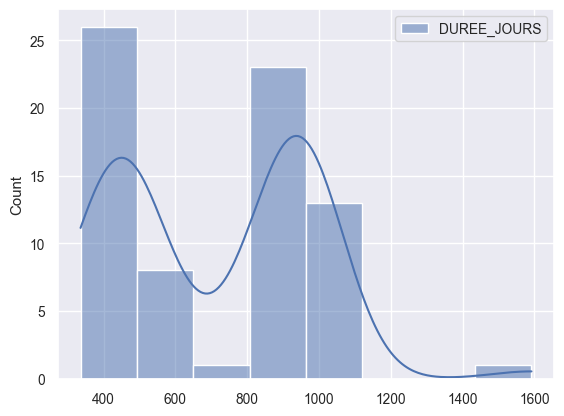

In [42]:
sns.histplot(X_duration_processed, kde=True);

In [39]:
PowerTransformer(method = "yeo-johnson").fit_transform(X_duration_processed)

array([[-0.92515687],
       [-1.20750467],
       [ 0.88164634],
       [ 0.94988391],
       [-1.36469703],
       [-0.78329353],
       [ 0.90551749],
       [ 1.0053656 ],
       [ 0.93219807],
       [-0.7452305 ],
       [ 0.97918304],
       [-1.55496516],
       [-0.84123938],
       [-1.34173865],
       [-1.08412467],
       [-1.04752236],
       [ 0.96456099],
       [-1.40529843],
       [ 0.74144171],
       [ 1.0169463 ],
       [ 0.89360031],
       [ 2.47783476],
       [-1.11053351],
       [-0.81213665],
       [-1.16943264],
       [ 0.77543782],
       [ 0.70400631],
       [ 1.06578652],
       [-0.80249371],
       [ 0.88762793],
       [ 0.4812444 ],
       [ 0.48456926],
       [-0.71228628],
       [ 0.40733326],
       [ 0.86364582],
       [-1.5858254 ],
       [ 0.97918304],
       [-1.3589411 ],
       [ 1.04574931],
       [ 0.70714002],
       [ 0.53408933],
       [-0.69826835],
       [-0.87552819],
       [ 0.89956348],
       [ 0.94399756],
       [-1

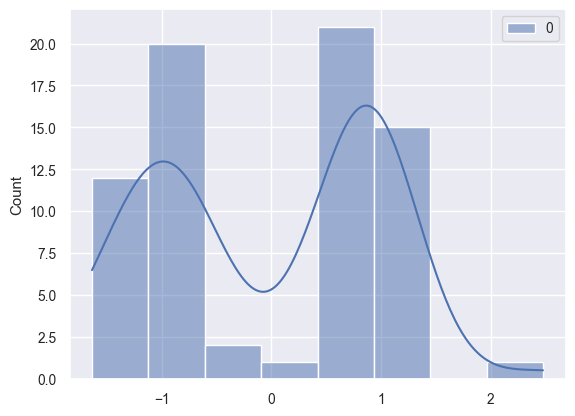

In [41]:
sns.histplot(PowerTransformer(method = "yeo-johnson").fit_transform(X_duration_processed), kde=True);

In [43]:
X_duration_processed.shape

(72, 1)

In [44]:
# Assemble the pipeline
# duration_pipeline = make_pipeline(
#     FunctionTransformer(transform_time_feature),
#     make_column_transformer(
#         (PowerTransformer(method = "box-cox", standardize = True), ["DUREE_JOURS"]),
#         remainder = "passthrough"
#     )
# ) # keep original DATE_FIN and DATE_DEBUT columns

duration_pipeline = make_pipeline(
    FunctionTransformer(transform_time_feature),
    PowerTransformer(method = "yeo-johnson", standardize=True)  # Apply PowerTransformer directly to 'DUREE_JOURS'
)

duration_pipeline.fit_transform(X)

array([[-0.92515687],
       [-1.20750467],
       [ 0.88164634],
       [ 0.94988391],
       [-1.36469703],
       [-0.78329353],
       [ 0.90551749],
       [ 1.0053656 ],
       [ 0.93219807],
       [-0.7452305 ],
       [ 0.97918304],
       [-1.55496516],
       [-0.84123938],
       [-1.34173865],
       [-1.08412467],
       [-1.04752236],
       [ 0.96456099],
       [-1.40529843],
       [ 0.74144171],
       [ 1.0169463 ],
       [ 0.89360031],
       [ 2.47783476],
       [-1.11053351],
       [-0.81213665],
       [-1.16943264],
       [ 0.77543782],
       [ 0.70400631],
       [ 1.06578652],
       [-0.80249371],
       [ 0.88762793],
       [ 0.4812444 ],
       [ 0.48456926],
       [-0.71228628],
       [ 0.40733326],
       [ 0.86364582],
       [-1.5858254 ],
       [ 0.97918304],
       [-1.3589411 ],
       [ 1.04574931],
       [ 0.70714002],
       [ 0.53408933],
       [-0.69826835],
       [-0.87552819],
       [ 0.89956348],
       [ 0.94399756],
       [-1

In [45]:
duration_pipeline.fit_transform(X).shape # output is DATE_FIN_DELTA - DATE_DEBUT_DELTA SCALED

(72, 1)

In [46]:
duration_pipeline

,steps,"[('functiontransformer', ...), ('powertransformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,func,<function tra...t 0x137954720>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


## Numeric pipeline: impute and scale
- impute NaN w/ a median strategy due to outliers
- scale using RobustScaler due to outliers

In [47]:
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(
    SimpleImputer(strategy = "median"),
    RobustScaler()
    )

date_cols = ["DATE_DEBUT_DELTA", "DATE_FIN_DELTA"]
# num_cols = make_column_selector(dtype_exclude = ["object","datetime64[ns]"])
# num_cols = lambda df: df.select_dtypes(include=np.number).columns.difference(drop_col).difference(df.select_dtypes(include = "object").columns)
num_cols = ["TENEUR","indicateur_1","VALEUR","CHIMIE3"]

In [48]:
drop_col

array(['indicateur_17', 'indicateur_7', 'indicateur_19', 'indicateur_25',
       'indicateur_14', 'indicateur_10', 'indicateur_9', 'indicateur_16',
       'indicateur_15', 'sortie_2', 'indicateur_39', 'indicateur_38',
       'indicateur_22', 'indicateur_23', 'sortie_3', 'indicateur_32',
       'indicateur_31', 'indicateur_37', 'indicateur_13', 'indicateur_2',
       'pc0min', 'indicateur_4', 'indicateur_6', 'indicateur_8',
       'indicateur_11', 'indicateur_18', 'indicateur_19', 'indicateur_20',
       'indicateur_24', 'indicateur_25', 'indicateur_29', 'indicateur_31',
       'indicateur_34', 'indicateur_36', 'indicateur_37', 'indicateur_40',
       'indicateur_41', 'UNIT', 'info'], dtype=object)

In [37]:
# num_cols(X)

Add num_pipeline to the preproc pipeline:

In [49]:
preproc = ColumnTransformer(
    [
     ("duration", duration_pipeline, date_cols),
     ("numeric", num_pipeline, num_cols)
    ],
)

In [50]:
preproc

,transformers,"[('duration', ...), ('numeric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<function tra...t 0x137954720>
,inverse_func,None
,validate,False


In [51]:
preproc.fit_transform(X).shape # Non-correlated features + DUREE_JOURS

(72, 5)

In [52]:
pd.DataFrame(preproc.fit_transform(X)).head()

,0,1,2,3,4
0,-0.925157,-0.045294,-0.590218,-0.324111,1.078948
1,-1.207505,-0.045294,-0.589292,-0.039526,0.175703
2,0.881646,-0.045294,-0.169561,-0.039526,0.087571
3,0.949884,-0.045294,0.009188,0.158103,0.474913
4,-1.364697,-0.045294,-0.512003,1.391304,-0.042182


## Catagorical pipeline: impute and scale

In [53]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = "ignore", sparse_output = False),
)

# cat_cols = ["TRIG","MATERIAU"]
cat_cols = ["TRIG"]

In [54]:
# Add cat_pipeline to preproc
preproc = ColumnTransformer(
    [
     ("duration_preprocessor", duration_pipeline, date_cols),
     ("numeric_preprocessor", num_pipeline, num_cols),
     ("categorical_preprocessor", cat_pipeline, cat_cols)
    ],
)

In [55]:
X.TRIG.unique(), X.MATERIAU.unique()

(array(['TOTO', 'LOLA', 'VET', 'LINK', 'ETC', 'DOT', 'SHB', 'MATC'],
       dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object))

In [56]:
preproc

,transformers,"[('duration_preprocessor', ...), ('numeric_preprocessor', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<function tra...t 0x137954720>
,inverse_func,None
,validate,False


In [57]:
preproc.fit_transform(X).shape

(72, 13)

In [58]:
pd.DataFrame(preproc.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.925157,-0.045294,-0.590218,-0.324111,1.078948,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.207505,-0.045294,-0.589292,-0.039526,0.175703,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.881646,-0.045294,-0.169561,-0.039526,0.087571,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.949884,-0.045294,0.009188,0.158103,0.474913,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.364697,-0.045294,-0.512003,1.391304,-0.042182,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


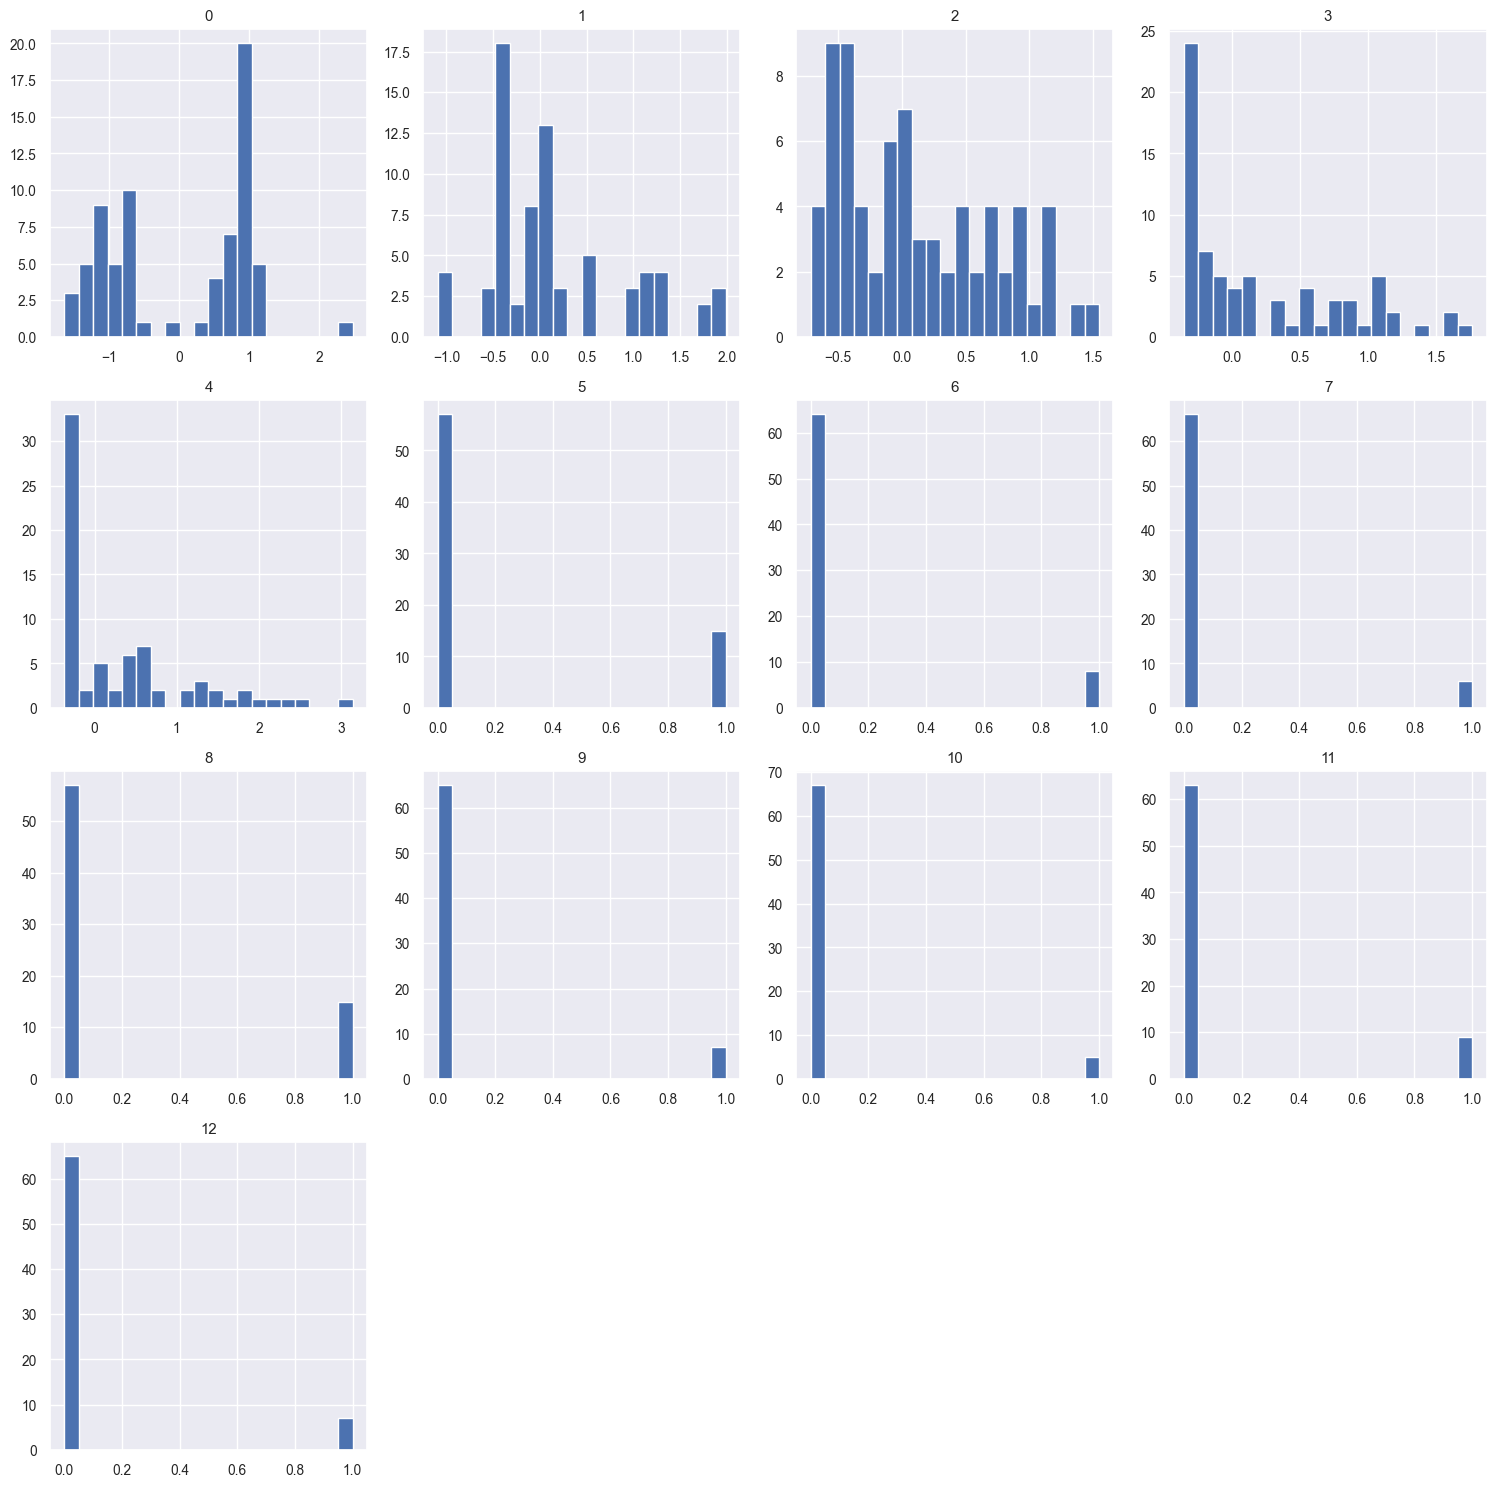

In [59]:
pd.DataFrame(preproc.fit_transform(X)).hist(figsize=(15, 15), bins = 20)
plt.tight_layout()
plt.show()

# 6. ML model selection (Full Pipeline)
**[Q9] Le SOUMISSIONNAIRE réalise une analyse via un modèle de machine learning en sélectionnant des ressources adaptées (par exemple, régression pour évaluer l'impact des variables météorologiques sur la production, modélisation des déséquilibres entre production et consommation)**
- Try 2 models since sample <100k
  - ElasticNet
  - Lasso (best performer for this use case)

In [60]:
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Define models
model_ENC = ElasticNetCV(cv = 5, random_state=42)
model_Lasso = LassoCV(cv = 5, random_state=42)

# Full pipe
pipeline_ENC = make_pipeline(
    preproc,
    model_ENC
)

pipeline_Lasso = make_pipeline(
    preproc,
    model_Lasso
)
pipeline_Lasso

,steps,"[('columntransformer', ...), ('lassocv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('duration_preprocessor', ...), ('numeric_preprocessor', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [61]:
y_train.isnull().sum()

np.int64(0)

In [62]:
# Train pipe
pipeline_ENC.fit(X_train, y_train)
pipeline_Lasso.fit(X_train, y_train)

# Predict
pipeline_ENC.predict(X_test)

array([1.76788632, 1.42572266, 4.00378641, 3.98806313, 0.60122763,
       1.937955  , 4.61796166, 1.18133036, 3.51185567, 1.17375346,
       1.60584746, 0.38376135, 4.05189159, 1.53103968, 2.86706817])

In [63]:
print("R² score for ENC:", r2_score(y_test, pipeline_ENC.predict(X_test)))

R² score for ENC: 0.47362228796535777


In [64]:
pipeline_Lasso.predict(X_test)
print("R² score for Lasso:", r2_score(y_test, pipeline_Lasso.predict(X_test)))

R² score for Lasso: 0.5045032127527562


In [65]:
from sklearn.model_selection import cross_val_score

# Cross-validate Pipeline
cross_val_score(pipeline_Lasso, X_train, y_train, cv=5, scoring='r2').mean()

np.float64(-0.2018965711067735)

In [66]:
# Grid search
pipeline_ENC.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('duration_preprocessor',
                                    Pipeline(steps=[('functiontransformer',
                                                     FunctionTransformer(func=<function transform_time_feature at 0x137954720>)),
                                                    ('powertransformer',
                                                     PowerTransformer())]),
                                    ['DATE_DEBUT_DELTA', 'DATE_FIN_DELTA']),
                                   ('numeric_preprocessor',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('robustscaler',
                                                     RobustScaler())]),
                                    ['TENEUR', 'indicateur_1', 'VALEUR',
                         

In [67]:
pipeline_Lasso.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('duration_preprocessor',
                                    Pipeline(steps=[('functiontransformer',
                                                     FunctionTransformer(func=<function transform_time_feature at 0x137954720>)),
                                                    ('powertransformer',
                                                     PowerTransformer())]),
                                    ['DATE_DEBUT_DELTA', 'DATE_FIN_DELTA']),
                                   ('numeric_preprocessor',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('robustscaler',
                                                     RobustScaler())]),
                                    ['TENEUR', 'indicateur_1', 'VALEUR',
                         

In [68]:
X_train_transformed = preproc.fit_transform(X_train)

X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.165647,-0.157704,-0.467002,1.408627,2.528438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.821414,-0.421329,0.082494,0.000000,-0.321689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.092512,-0.208349,-0.083684,0.070640,-0.346315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315182,1.127973,0.049460,-0.391520,0.856777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.623768,0.077177,0.115535,0.909729,-0.384609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


I used function transformers which are easier to integrate later in the pipeline:

In [69]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Function to drop duplicates
def drop_duplicates_fun(df):
  return df.drop_duplicates()

df_silver = drop_duplicates_fun(df)

len(df_silver)

72

# 7. Dummy Model: Linear Regression
**[Q10] Le SOUMISSIONNAIRE réalise une analyse via un modèle classique (régression linéaire)**

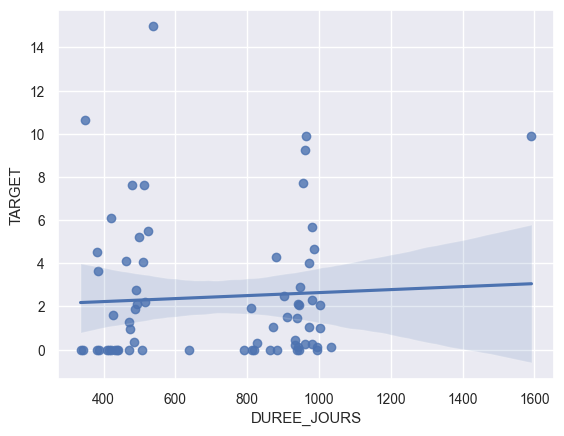

In [75]:
sns.regplot(y = df_silver.TARGET, x = X_duration_processed, data = df_silver);

In [72]:
X_duration_processed.isna().sum()


DUREE_JOURS    0
dtype: int64

In [ ]:
df_silver.TARGET.isna().sum()

np.int64(4)

In [88]:
import statsmodels.api as sm
X = X_duration_processed
Y = df_silver.TARGET
model = sm.OLS(Y, X).fit() # Finds the best beta
model.predict(X) # The Y_pred (regression-line)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 TARGET   R-squared (uncentered):                   0.350
Model:                            OLS   Adj. R-squared (uncentered):              0.341
Method:                 Least Squares   F-statistic:                              38.19
Date:                Sat, 07 Jun 2025   Prob (F-statistic):                    3.61e-08
Time:                        10:58:37   Log-Likelihood:                         -186.06
No. Observations:                  72   AIC:                                      374.1
Df Residuals:                      71   BIC:                                      376.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DUREE_JOURS     0.0031      0.000      6.180      0.000       0.002       0.004
==============================================================================
Omnibus:                       32.581   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.385
Skew:                           1.659   Prob(JB):                     4.68e-14
Kurtosis:                       6.074   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""